In [1]:
import requests
from lxml import etree

def request_url(url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.109 Safari/537.36'
    headers = {'User-Agent': user_agent} 
    
    res = requests.get(url,headers=headers)
    res.encoding = 'utf-8'
    return res.text

url = 'https://finance.sina.com.cn/roll/index.d.html?cid=56588&page=4'
selector = etree.HTML(request_url(url))
pstring = '//*[@id="Main"]/div[3]/ul[1]/li/a'

selector.xpath(pstring)
[x.text for x in selector.xpath(pstring)]

['2020年11月12日涨停板早知道：七大利好有望发酵',
 '江苏省发布区块链产业发展计划 相关应用有望提速(附股)',
 '2020年11月11日涨停板早知道：七大利好有望发酵',
 '辉瑞新冠疫苗有效性超90% 这些疫苗概念股可关注(附股)',
 '2020年11月10日涨停板早知道：七大利好有望发酵']

In [2]:
from bs4 import BeautifulSoup

content_list = []
date_list = []
for page in range(1, 800):
    url = "https://finance.sina.com.cn/roll/index.d.html?cid=56588&page={}".format(page)
    soup = BeautifulSoup(request_url(url), 'lxml')
    for li in soup.find_all('li'):
        if len(li.a.text) > 5 :
            date_list.append(li.span.get_text()[1:6])
            content_list.append(li.a.text)

In [3]:
print(len(content_list))
print(content_list[0])

35955
盈趣科技：利润率过于优秀


In [4]:
import pandas as pd

df = pd.DataFrame({"date":date_list, "news": content_list})

In [5]:
df.head()

,date,news
0,01月16,盈趣科技：利润率过于优秀
1,01月16,康鹏科技：核心主业停滞不前 新业务增长“疑窦丛生”
2,01月16,昊海生科：业绩骤降 减值风险显现
3,01月16,三房巷虚假陈述案诉讼时效即将到期 数百位受损股民已获赔偿
4,01月14,2021年1月15日涨停板早知道：七大利好有望发酵


In [6]:
from snownlp import SnowNLP

pos_news = []
pod_date = []
neg_news = []
neg_date = []
score = []

df["score"] = df["news"]
df["category"] = df["news"]
#保存情感极性值小于等于0.5的结果为负面情感结果
for i in range(0, df.shape[0]):
    s = SnowNLP(df["news"][i])
    if s.sentiments <= 0.5:
        df["score"][i] = s.sentiments
        df["category"][i] = 0
        neg_news.append(df["news"][i])
        neg_date.append(df["date"][i])
        score.append(s.sentiments)
    else:
        df["score"][i] = s.sentiments
        df["category"][i] = 1
        pos_news.append(df["news"][i])
        pod_date.append(df["date"][i])
        score.append(s.sentiments)

In [7]:
print(len(pos_news))
print(len(neg_news))
print(score[0])

27131
8824
0.8962160765556467


In [8]:
df.to_csv("data/news_data_raw.csv")

In [9]:
df.head()

,date,news,score,category
0,01月16,盈趣科技：利润率过于优秀,0.896216,1
1,01月16,康鹏科技：核心主业停滞不前 新业务增长“疑窦丛生”,0.881391,1
2,01月16,昊海生科：业绩骤降 减值风险显现,0.892718,1
3,01月16,三房巷虚假陈述案诉讼时效即将到期 数百位受损股民已获赔偿,0.0910783,0
4,01月14,2021年1月15日涨停板早知道：七大利好有望发酵,0.643451,1


In [10]:
df.shape

(35955, 4)

In [11]:
df.drop_duplicates(subset=["date"], keep="first" , inplace=True)

In [12]:
df.shape

(241, 4)

In [13]:
df.head()

,date,news,score,category
0,01月16,盈趣科技：利润率过于优秀,0.896216,1
4,01月14,2021年1月15日涨停板早知道：七大利好有望发酵,0.643451,1
5,01月13,2021年1月14日涨停板早知道：七大利好有望发酵,0.662349,1
6,01月12,2021年1月13日涨停板早知道：七大利好有望发酵,0.673256,1
7,01月11,2021年1月12日涨停板早知道：七大利好有望发酵,0.594757,1


In [14]:
df["date"].value_counts()

05月19    1
12月08    1
05月12    1
06月04    1
07月31    1
        ..
07月24    1
03月25    1
11月15    1
05月25    1
05月11    1
Name: date, Length: 241, dtype: int64

In [15]:
df.to_csv("data/news_data.csv")

In [16]:
df.date.values

array(['01月16', '01月14', '01月13', '01月12', '01月11', '01月10', '01月07',
       '01月06', '01月05', '01月04', '01月03', '12月31', '12月30', '12月29',
       '12月28', '12月27', '12月25', '12月24', '12月23', '12月22', '12月21',
       '12月20', '12月17', '12月16', '12月15', '12月14', '12月13', '12月12',
       '12月11', '12月10', '12月09', '12月08', '12月07', '12月06', '12月04',
       '12月03', '12月02', '12月01', '11月30', '11月29', '11月28', '11月26',
       '11月25', '11月24', '11月23', '11月22', '11月20', '11月19', '11月18',
       '11月17', '11月16', '11月15', '11月13', '11月12', '11月11', '11月10',
       '11月09', '11月08', '11月06', '11月05', '11月04', '11月03', '11月02',
       '11月01', '10月30', '10月29', '10月28', '10月27', '10月26', '10月25',
       '10月23', '10月22', '10月21', '10月20', '10月19', '10月18', '10月15',
       '10月14', '10月13', '10月12', '10月11', '10月08', '09月29', '09月28',
       '09月27', '09月24', '09月23', '09月22', '09月21', '09月20', '09月18',
       '09月17', '09月16', '09月15', '09月14', '09月13', '09月10', '09月09',
       '09月08', '09月

In [17]:
# 取近三个月数据
print(df.iloc[10:81])

      date                          news      score category
18   01月03      2021年1月4日涨停板早知道：七大利好有望发酵   0.675767        1
19   12月31  德冠新材IPO过会 禁塑令下毛利率落后同行、偿债压力在身  0.0406899        0
26   12月30    2020年12月31日涨停板早知道：七大利好有望发酵   0.789352        1
32   12月29    2020年12月30日涨停板早知道：七大利好有望发酵   0.672372        1
33   12月28    2020年12月29日涨停板早知道：七大利好有望发酵   0.608482        1
..     ...                           ...        ...      ...
288  10月15    2020年10月16日涨停板早知道：七大利好有望发酵   0.568952        1
289  10月14    2020年10月15日涨停板早知道：七大利好有望发酵   0.669055        1
290  10月13    2020年10月14日涨停板早知道：七大利好有望发酵   0.687255        1
291  10月12    2020年10月13日涨停板早知道：七大利好有望发酵   0.697725        1
292  10月11    2020年10月12日涨停板早知道：七大利好有望发酵   0.621802        1

[71 rows x 4 columns]


In [18]:
# 观察近三个月的股市波动情况
import tushare as ts

token='80a0fc7a658d32315e77b9afd9af2f2bc4a6f5cea56f3b2c8c6f4ce6'
ts.set_token(token)
pro = ts.pro_api()
data = pro.index_daily(ts_code='000001.SH', start_date='202001001', end_date='20210101')
data.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20201231,3473.0693,3419.7267,3474.9182,3419.7267,3414.4527,58.6166,1.7167,335673926.0,450482318.9
1,000001.SH,20201230,3414.4527,3375.0086,3414.4539,3374.4156,3379.0362,35.4165,1.0481,291023543.0,377542350.9
2,000001.SH,20201229,3379.0362,3399.2939,3407.0884,3376.0876,3397.2854,-18.2492,-0.5372,311769185.0,382102563.8
3,000001.SH,20201228,3397.2854,3396.3590,3412.5193,3383.6540,3396.5626,0.7228,0.0213,316181542.0,398159968.8
4,000001.SH,20201225,3396.5626,3351.7901,3397.0066,3348.3453,3363.1133,33.4493,0.9946,294546895.0,359094444.7


In [19]:
print(data.shape)
data.to_csv("data/finance_data.csv")

(243, 11)


<AxesSubplot:>

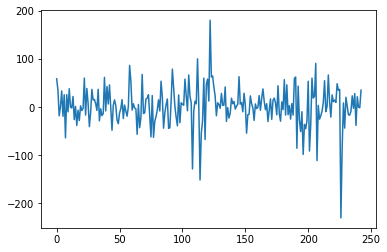

In [20]:
data.set_index("trade_date")
data["change"].plot.line()

<AxesSubplot:>

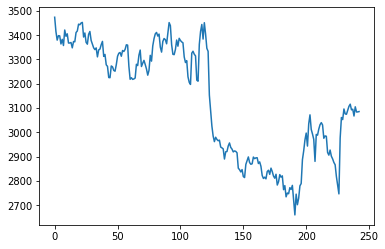

In [21]:
data["close"].plot.line()